In [1]:
import numpy as np

In [17]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns 

In [5]:
df = pd.read_csv('malaria_diagnosis_dataset.csv')

In [6]:
df.head()

age  gender  body_temperature  fever  headache  vomiting  chills  sweating  \
0   33  Female              37.1      0         0         0       0         0   
1   10    Male              38.1      0         0         0       1         1   
2   44    Male              37.1      0         0         1       0         0   
3    5    Male              36.1      0         1         0       0         0   
4   14  Female              38.5      1         0         1       1         1   

   fatigue  muscle_pain  nausea  diarrhea  anemia  parasite_count  \
0        0            1       0         0       0               0   
1        1            1       0         0       0           81071   
2        0            0       1         0       0               0   
3        1            0       0         1       0               0   
4        0            0       1         1       0          165765   

   rapid_diagnostic_test  microscopy_result  malaria_test_result  
0                      0                  0                    0  
1                      1                  1                    1  
2                      0                  0                    0  
3                      0                  0                    0  
4                      1                  1                    1

In [7]:
print(df['malaria_test_result'].value_counts())

malaria_test_result
1    1008
0     992
Name: count, dtype: int64


In [8]:
df.shape

(2000, 17)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    2000 non-null   int64  
 1   gender                 2000 non-null   object 
 2   body_temperature       2000 non-null   float64
 3   fever                  2000 non-null   int64  
 4   headache               2000 non-null   int64  
 5   vomiting               2000 non-null   int64  
 6   chills                 2000 non-null   int64  
 7   sweating               2000 non-null   int64  
 8   fatigue                2000 non-null   int64  
 9   muscle_pain            2000 non-null   int64  
 10  nausea                 2000 non-null   int64  
 11  diarrhea               2000 non-null   int64  
 12  anemia                 2000 non-null   int64  
 13  parasite_count         2000 non-null   int64  
 14  rapid_diagnostic_test  2000 non-null   int64  
 15  micr

In [10]:
df.describe()

age  body_temperature        fever     headache     vomiting  \
count  2000.000000       2000.000000  2000.000000  2000.000000  2000.000000   
mean     17.487500         37.584300     0.533000     0.456500     0.351000   
std      18.822805          0.987173     0.499035     0.498229     0.477402   
min       0.000000         35.500000     0.000000     0.000000     0.000000   
25%       5.000000         36.800000     0.000000     0.000000     0.000000   
50%      10.000000         37.400000     1.000000     0.000000     0.000000   
75%      22.000000         38.400000     1.000000     1.000000     1.000000   
max      70.000000         40.700000     1.000000     1.000000     1.000000   

            chills     sweating      fatigue  muscle_pain       nausea  \
count  2000.000000  2000.000000  2000.000000   2000.00000  2000.000000   
mean      0.423000     0.380000     0.510500      0.31300     0.313500   
std       0.494159     0.485508     0.500015      0.46383     0.464032   
min       0.000000     0.000000     0.000000      0.00000     0.000000   
25%       0.000000     0.000000     0.000000      0.00000     0.000000   
50%       0.000000     0.000000     1.000000      0.00000     0.000000   
75%       1.000000     1.000000     1.000000      1.00000     1.000000   
max       1.000000     1.000000     1.000000      1.00000     1.000000   

          diarrhea      anemia  parasite_count  rapid_diagnostic_test  \
count  2000.000000  2000.00000     2000.000000            2000.000000   
mean      0.170000     0.19850    49272.658500               0.503000   
std       0.375727     0.39897    63520.753891               0.500116   
min       0.000000     0.00000        0.000000               0.000000   
25%       0.000000     0.00000        0.000000               0.000000   
50%       0.000000     0.00000     1757.500000               1.000000   
75%       0.000000     0.00000    97625.750000               1.000000   
max       1.000000     1.00000   199847.000000               1.000000   

       microscopy_result  malaria_test_result  
count          2000.0000          2000.000000  
mean              0.5050             0.504000  
std               0.5001             0.500109  
min               0.0000             0.000000  
25%               0.0000             0.000000  
50%               1.0000             1.000000  
75%               1.0000             1.000000  
max               1.0000             1.000000

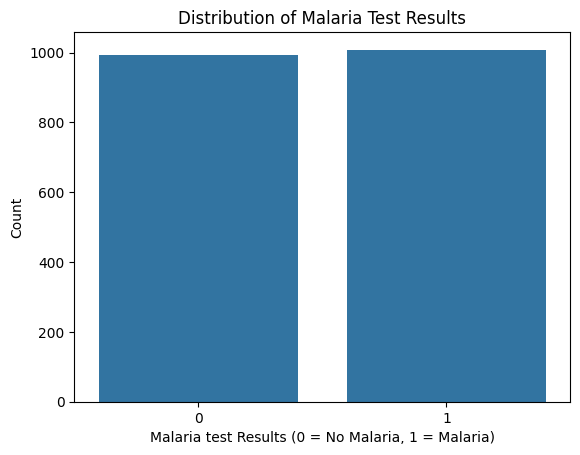

In [11]:
sns.countplot(x='malaria_test_result', data=df)
plt.title('Distribution of Malaria Test Results')
plt.xlabel('Malaria test Results (0 = No Malaria, 1 = Malaria)')
plt.ylabel('Count')
plt.show()

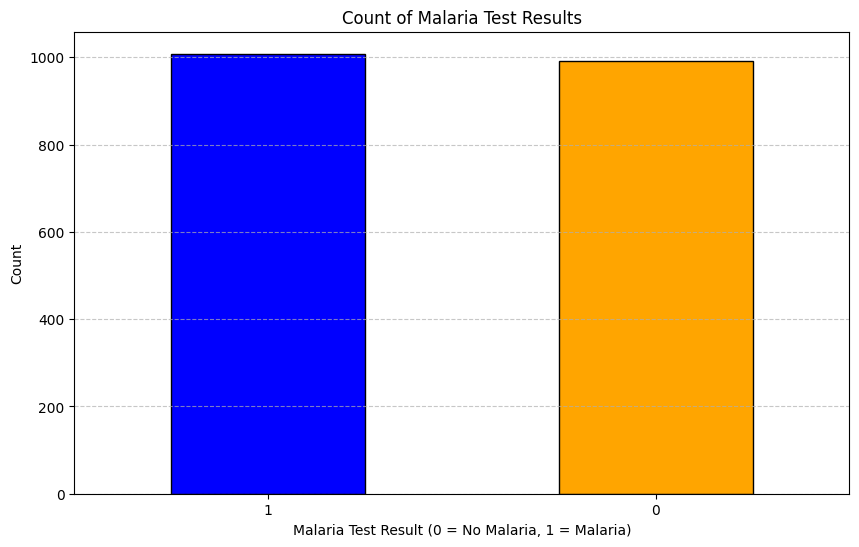

In [12]:
malaria_test_result_counts = df['malaria_test_result'].value_counts()

plt.figure(figsize=(10, 6))
malaria_test_result_counts.plot(kind='bar', color=['blue', 'orange'],edgecolor='black')
plt.title('Count of Malaria Test Results')
plt.xlabel('Malaria Test Result (0 = No Malaria, 1 = Malaria)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
# Correlation matrix

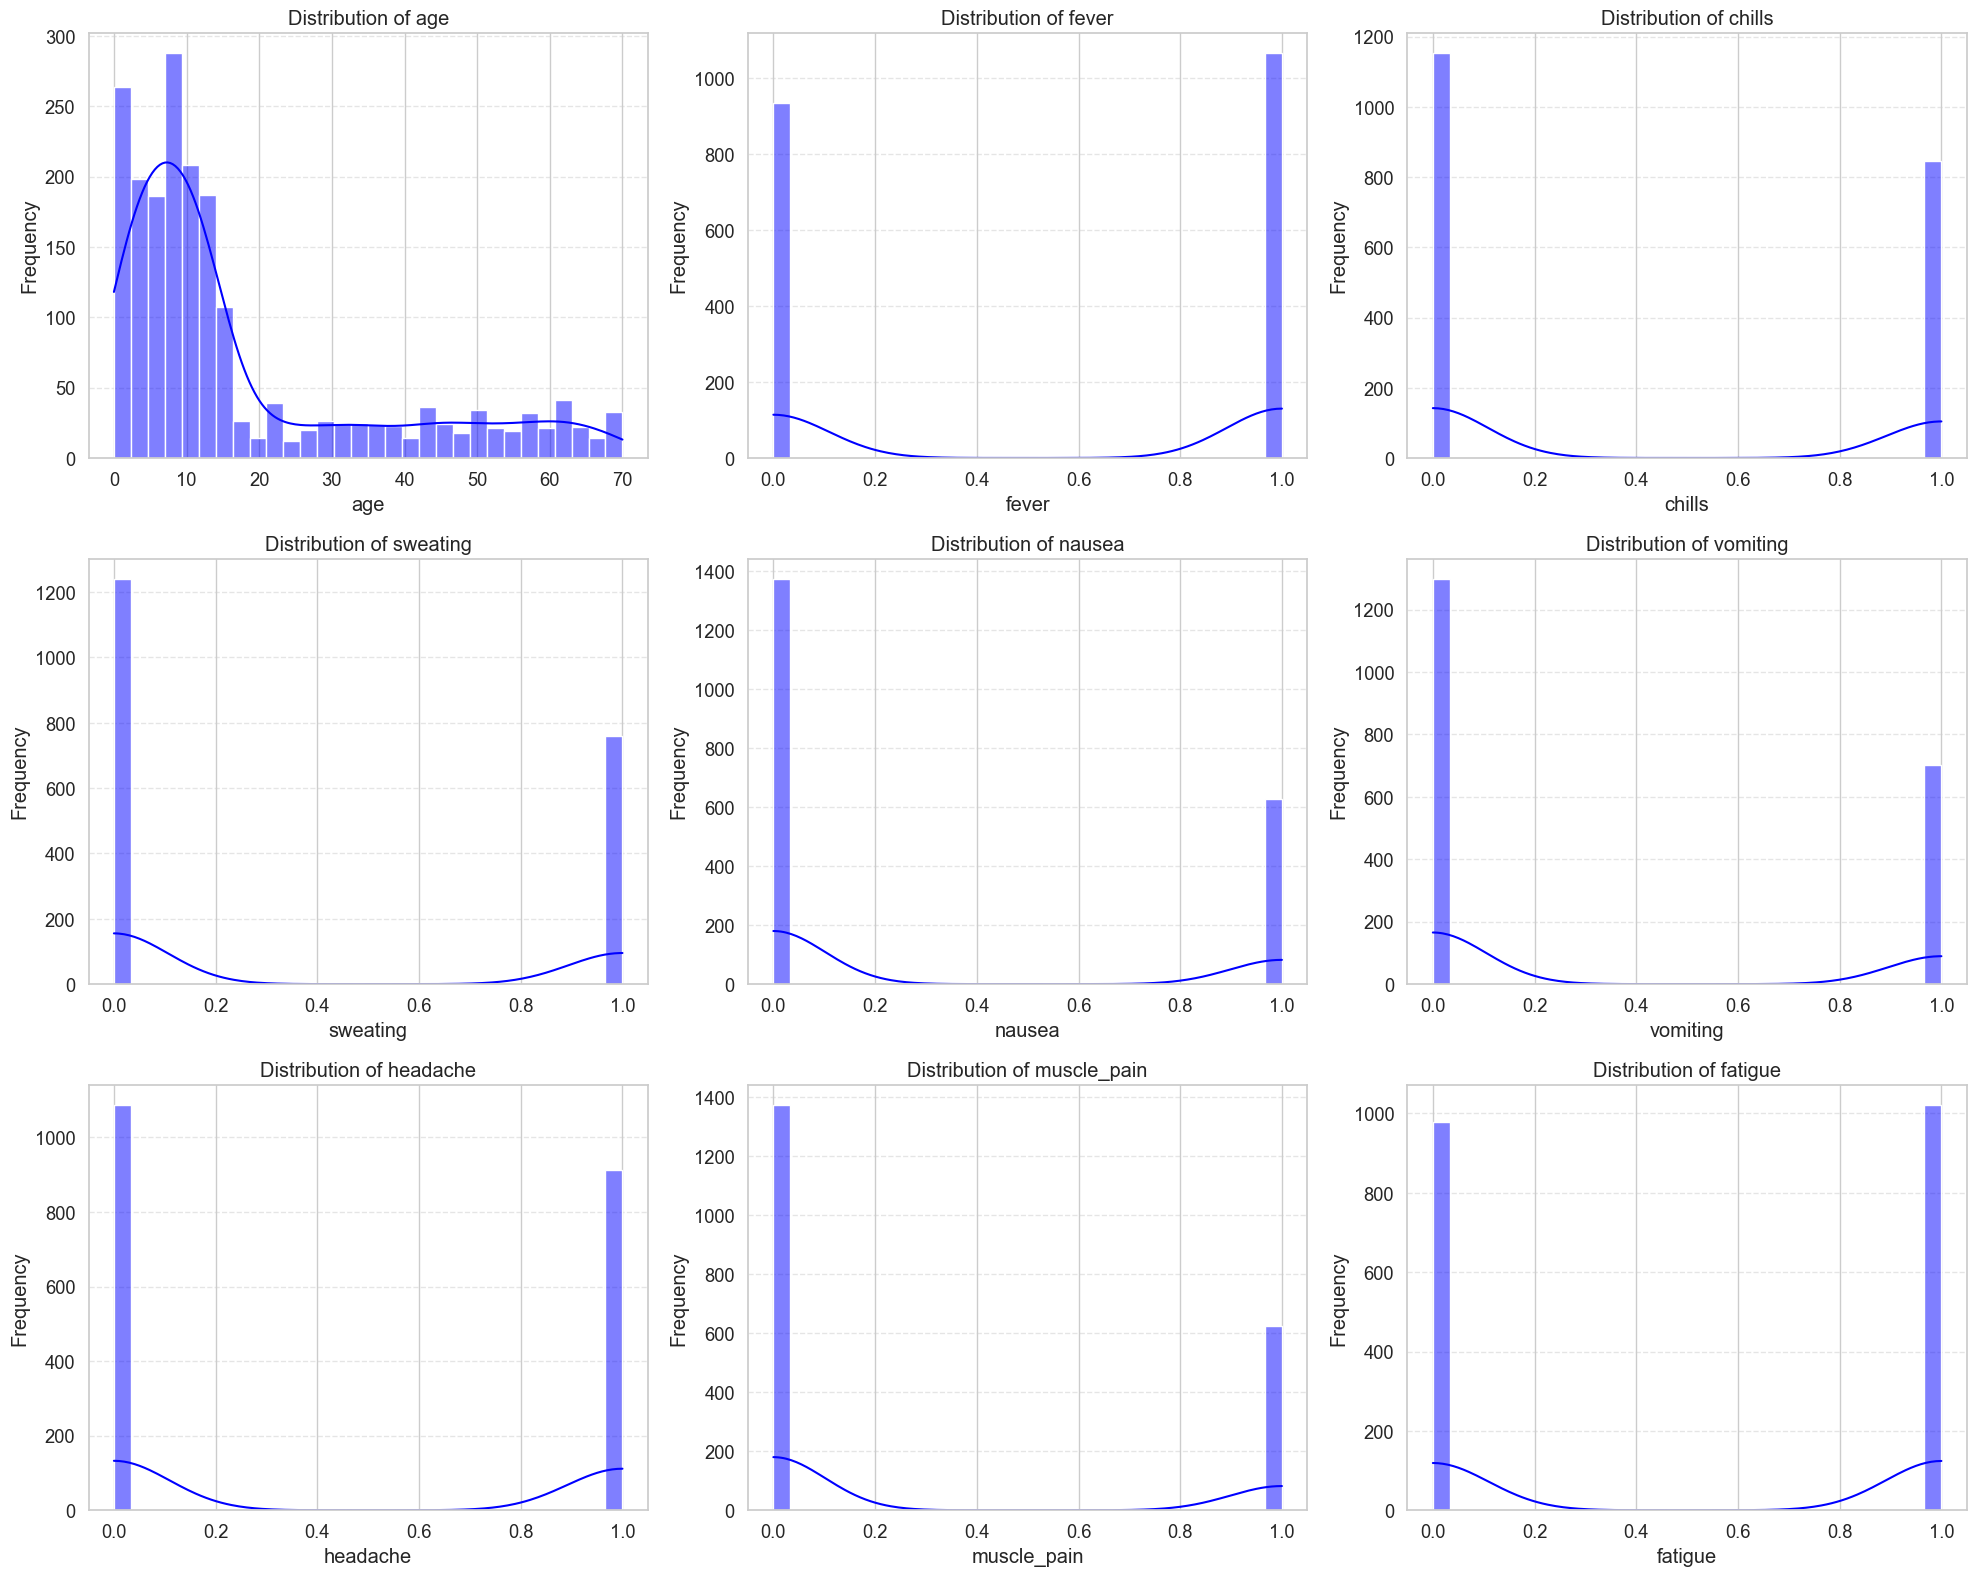

In [13]:
sns.set(style='whitegrid', font_scale=1.2)
features = ('age', 'fever', 'chills', 'sweating', 'nausea', 'vomiting', 'headache', 'muscle_pain', 'fatigue')
plt.figure(figsize=(20, 16))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[feature], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

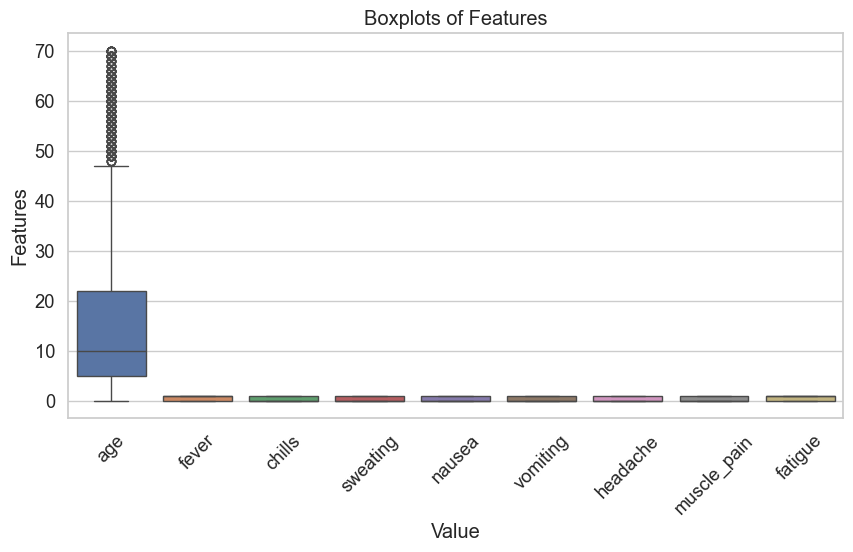

In [14]:
features_to_plot = ['age', 'fever', 'chills', 'sweating', 'nausea', 'vomiting', 'headache', 'muscle_pain', 'fatigue']
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[features_to_plot])
plt.title('Boxplots of Features')
plt.xlabel('Value')
plt.ylabel('Features')
plt.xticks(rotation=45)
plt.show()

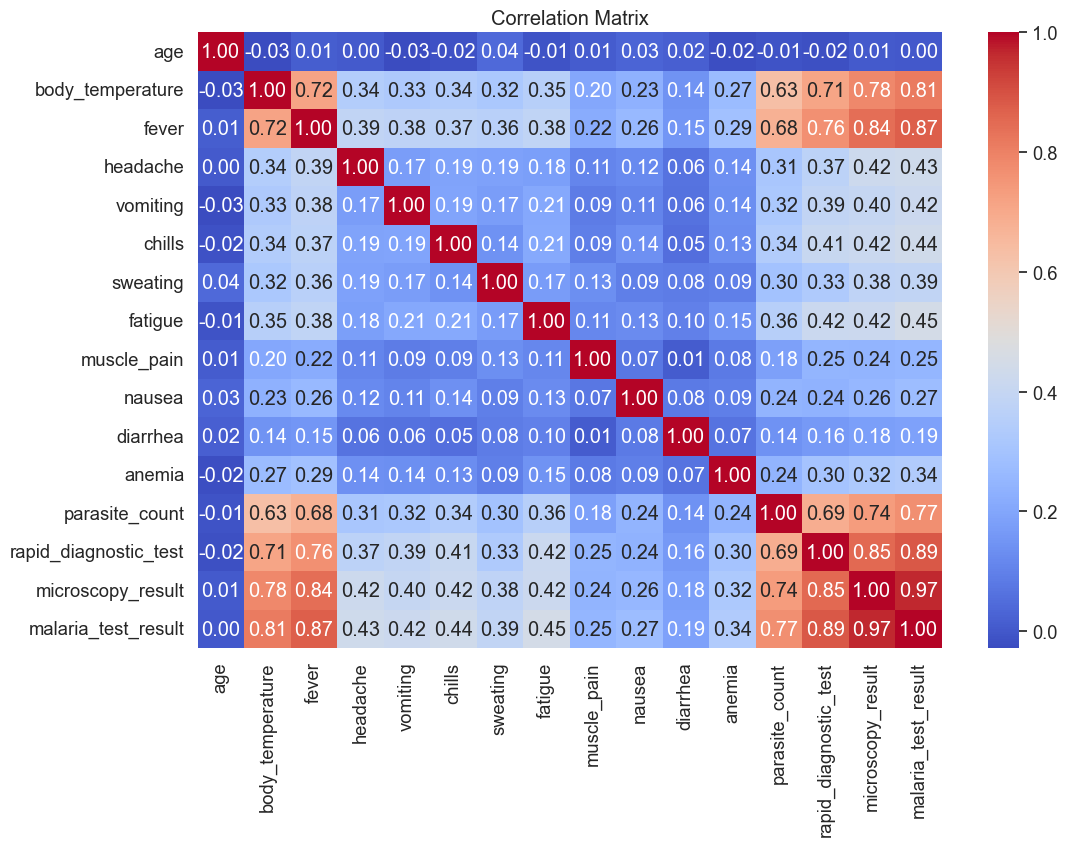

In [15]:
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [16]:
invalid_cols = ['age', 'fever', 'chills', 'sweating', 'nausea', 'vomiting', 'headache', 'muscle_pain', 'fatigue']
df[invalid_cols] = df[invalid_cols].repl

AttributeError: 'DataFrame' object has no attribute 'repl'

In [ ]:
df.isnull().sum()

age                      0
gender                   0
body_temperature         0
fever                    0
headache                 0
vomiting                 0
chills                   0
sweating                 0
fatigue                  0
muscle_pain              0
nausea                   0
diarrhea                 0
anemia                   0
parasite_count           0
rapid_diagnostic_test    0
microscopy_result        0
malaria_test_result      0
dtype: int64

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("malaria_diagnosis_dataset.csv")

# Separate features and target
X = df.drop(columns=['malaria_test_result'])
y = df['malaria_test_result']

# Convert categorical variables to numeric
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Evaluation
print("ðŸ“˜ Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_rf))


ðŸ“˜ Random Forest Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       287
           1       1.00      1.00      1.00       313

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

Confusion Matrix:
 [[287   0]
 [  0 313]]
ROC AUC Score: 1.0


In [ ]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

# Evaluation
print("ðŸ“— Logistic Regression Classification Report:\n")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_lr))


ðŸ“— Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       287
           1       1.00      1.00      1.00       313

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

Confusion Matrix:
 [[287   0]
 [  1 312]]
ROC AUC Score: 1.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train the model on full data
final_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_model.fit(X, y)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression
final_model = LogisticRegression(max_iter=1000, random_state=42)
final_model.fit(X, y)


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
import joblib

# Save the model
joblib.dump(final_model, "malaria_classifier_model.pkl")

# Save your preprocessed features (columns used for prediction)
joblib.dump(X.columns.tolist(), "feature_columns.pkl")


['feature_columns.pkl']

In [ ]:
import joblib
import pandas as pd

# Load the model and features
model = joblib.load("malaria_classifier_model.pkl")
features = joblib.load("feature_columns.pkl")

# New patient example
new_data = pd.DataFrame([{
    'age': 8,
    'gender_Male': 1,
    'body_temperature': 38.5,
    'fever': 1,
    'headache': 1,
    'vomiting': 0,
    'chills': 1,
    'sweating': 0,
    'fatigue': 1,
    'muscle_pain': 0,
    'nausea': 0,
    'diarrhea': 0,
    'anemia': 0,
    'parasite_count': 95000,
    'rapid_diagnostic_test': 1,
    'microscopy_result': 1
}])[features]  # ensure correct column order

# Predict
prediction = model.predict(new_data)[0]
print("Malaria Detected" if prediction else "No Malaria Detected")


Malaria Detected


In [ ]:
import joblib

# Save trained model and feature columns
joblib.dump(final_model, "malaria_classifier_model.pkl")
joblib.dump(X.columns.tolist(), "feature_columns.pkl")


['feature_columns.pkl']